## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


Part1:Distribution on body temperature

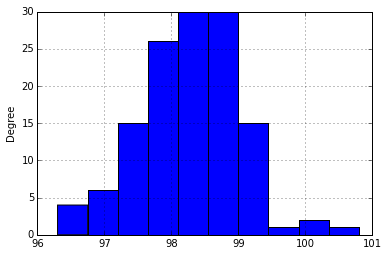

In [5]:
df['temperature'].plot(kind='hist')

In [6]:
st.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since the p-value of the normaltest is >0.05, it is unlikely that it is not normally distributed.

Part 2: Is the true population mean 98.6 degrees?
    

In [7]:
sample_mean=round(df['temperature'].mean(),2)
sample_mean

98.25

In [12]:
sample_se = (df['temperature'].std()/np.sqrt(df['temperature'].count()))
sample_se

0.064304416838104755

In [15]:
CI_hi = sample_mean+2*sample_se
CI_hi

98.378608833676211

Since 98.6 is much larger than 98.37, we can say that the population mean is not 98.6 using a 95 percent confidence interval

Calculating z-score:

In [17]:
n=len(df)
n

130

since n>30, we can use a Z-statistic

In [21]:
Z_Score = round((sample_mean - 98.6)/(sample_se),2)
print('The Z score is: %.2f' % (Z_Score))

The Z score is: -5.44


Z_Score is greater than 1.96, hence we say reject the null hypothesis (population mean is 98.6) and accept alternate hypothesis (population mean is not 98.6)

Part 3: At what temperature should we consider someone's temperature to be "abnormal"?

In [37]:
low_limit = sample_mean - 1.96*df['temperature'].std()
hi_limit = sample_mean + 1.96*df['temperature'].std()

In [38]:
print "Range of abnormal body temperature is between %.2f and %.2f" %(low_limit,hi_limit)

Range of abnormal body temperature is between 96.81 and 99.69


Is there a significant difference between males and females in normal temperature?

In [46]:
male_df=df[df.gender=='M']
male_df_mean=round(male_df['temperature'].mean(),2)
n_male = len(male_df)
std_male = round(male_df['temperature'].std(),2)
print "Mean temperature of body temperature for males : %.2f" %male_df_mean
print "Standard deviation of  body temperate for males: %.2f" %std_male
print "Number of observations for male: %d" %n_male


Mean temperature of body temperature for males : 98.10
Standard deviation of  body temperate for males: 0.70
Number of observations for male: 65


In [47]:
female_df=df[df.gender=='F']
female_df_mean=round(female_df['temperature'].mean(),2)
n_female = len(female_df)
std_female = round(female_df['temperature'].std(),2)
print "Mean temperature of body temperature females : %.2f" %female_df_mean
print "Standard deviation of  body temperate for females: %.2f" %std_female
print "Number of observations female: %d" %n_female

Mean temperature of body temperature females : 98.39
Standard deviation of  body temperate for females: 0.74
Number of observations female: 65


Calculating the test statistic for difference of means:

In [53]:
z_score = (female_df_mean-male_df_mean)/np.sqrt((std_female*std_female/n_female) +(std_male*std_male/n_male))

In [55]:
print "Calculated Z_Score for difference of means is %.2f" %z_score

Calculated Z_Score for difference of means is 2.30


Since Z_score is > 2, there is a difference between male and female body temperatures